Import gym-environment problem cart-pole v0 as well as other necessary libraries.

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

For comparison purposes we will display the results of a random equiprobable policy to get a sense of baseline performance.

Iterations that were run: 19


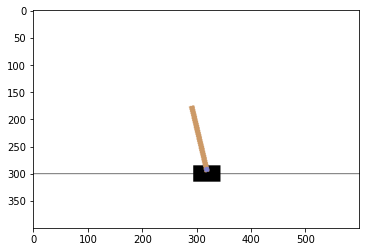

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

##a. On-Policy SARSA

We will now try to solve the cart-pole v0 problem using an On-policy SARSA algorithm. 

First we create functions for an epsilon greedy policy based on estimates of Q as well as a function which will take a continuous state and discretize it by placing into one of the bins we create later on. 

In [ ]:
#epsilon greedy action selection based on estimated Q
def action_selection(Q,s):
    if np.random.uniform(0,1) < epsilon:
        a = env.action_space.sample()
    else: 
        a = np.argmax(Q[str(s)])
    return a

def disc_state(s):
    #give state as a list of ints and return discretized
    s_disc = [min(cp_space, key=lambda x:abs(x-s[0])), min(cv_space, key=lambda x:abs(x-s[1])), min(pa_space, key=lambda x:abs(x-s[2])),min(pvt_space, key=lambda x:abs(x-s[3]))]
    return s_disc

def test_policy(Q):   

    s = env.reset()
    prev_screen = env.render(mode='rgb_array')
    plt.imshow(prev_screen)
    scores = []


    for i in range(10001):
        s = disc_state(s)
        action = action_selection(Q,s)
        #print("step i",i,"action=",action)
        obs, reward, done, info = env.step(action)
        #print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
        #screen = env.render(mode='rgb_array')
  
        #plt.imshow(screen)
        #ipythondisplay.clear_output(wait=False)
        #ipythondisplay.display(plt.gcf())
        s = obs
        if done:
            return i+1
            break
    
    ipythondisplay.clear_output(wait=False)
    env.close()
    print("Iterations that were run:",i)
    scores.append(i)
    return scores
    



We discretize the state space, initilize model parameters and create the algorithm for on-policy SARSA. We train using 10000 episodes, with epsilon 0.5, alpha =0.01 and do not discount (gamma = 1).

In [ ]:
#discretize the state space
cp_space = np.linspace(-2.4,2.4, 50)
cv_space = np.linspace(-2, 2, 50)
pa_space = np.linspace(-41.8, 41.8, 50)
pvt_space = np.linspace(-3, 3, 50)

n_S = len(cp_space)*len(cv_space)*len(pa_space)*len(pvt_space)
n_A = 2
s = np.zeros(shape = (n_S, 4))


cp_index = 0 
cv_index = 0
pa_index = 0
pvt_index = 0

for i in range(n_S):
    s[i][3] = pvt_space[pvt_index]
    s[i][2] = pa_space[pa_index]
    s[i][1] = cv_space[cv_index]
    s[i][0] = cp_space[cp_index]
    pvt_index += 1
    if pvt_index == len(pvt_space):
        pvt_index = 0
        pa_index+=1
        if pa_index == len(pa_space):
            pa_index = 0
            cv_index+=1
            if cv_index == len(cv_space):
                cv_index = 0
                cp_index +=1
s = s.tolist()

#initialize Q
Q_onpolicy_SARSA = {}
for state in s:
    Q_onpolicy_SARSA[str(state)] = [0,0]


#Set algorithm parameters
maxEpisodes = 10000
maxSteps = 1000
epsilon = 0.1
alpha = 0.5
discount = 0.9

#Run the algorithm to update Q
print(Q_onpolicy_SARSA.values())
for episode in range(maxEpisodes):
    time_step = 0
    s = disc_state(env.reset())
    t = 0
    a = action_selection(Q_onpolicy_SARSA,s)
    while t < maxSteps:
        s_, r, gameState, _ = env.step(a)
        s_ = disc_state(s_)
        a_ = action_selection(Q_onpolicy_SARSA,s_)
        Q_onpolicy_SARSA[str(s)][a] =  Q_onpolicy_SARSA[str(s)][a] + alpha * (r + discount *  Q_onpolicy_SARSA[str(s_)][a_]  -  Q_onpolicy_SARSA[str(s)][a] ) 

        s = s_
        a = a_
        t += 1
        #epsilon = 1/t
        
        if gameState == True:
            break
print(Q_onpolicy_SARSA.values())


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
1
2
3
4
5
6
7
8
9
10


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



We will create a function to test our policy and display the number of iterations in the episode. This can be reused later on to test other TD(0) approaches.

Average score using on policy SARSA: 75.0


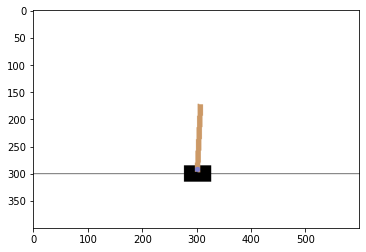

In [ ]:
onpolicy_average = np.mean(test_policy(Q_onpolicy_SARSA))
print('Average score using on policy SARSA:', onpolicy_average)

We can see that the on-policy SARSA performed decently well balancing up to 75 time steps on average. I think if the state-action space was further discretized and more episodes were used for training (say 20,000) the policy could be improved.

##b. Off-Policy Q-Learning

We will now try to solve the cart-pole v0 problem by using an off-policy Q-learning algorithm. We note the only difference between this and the previous algorith is the formula for updating Q. Rather than use the next time step estimate Q(s',a') based on our epsilon greedy policy we use the max(a): Q(s',a) at the next time step. 

In [ ]:
#initialize Q
#discretize the state space
cp_space = np.linspace(-2.4,2.4, 50)
cv_space = np.linspace(-2, 2, 50)
pa_space = np.linspace(-41.8, 41.8, 50)
pvt_space = np.linspace(-3, 3, 50)

n_S = len(cp_space)*len(cv_space)*len(pa_space)*len(pvt_space)
n_A = 2
s = np.zeros(shape = (n_S, 4))


cp_index = 0 
cv_index = 0
pa_index = 0
pvt_index = 0

for i in range(n_S):
    s[i][3] = pvt_space[pvt_index]
    s[i][2] = pa_space[pa_index]
    s[i][1] = cv_space[cv_index]
    s[i][0] = cp_space[cp_index]
    pvt_index += 1
    if pvt_index == len(pvt_space):
        pvt_index = 0
        pa_index+=1
        if pa_index == len(pa_space):
            pa_index = 0
            cv_index+=1
            if cv_index == len(cv_space):
                cv_index = 0
                cp_index +=1
s = s.tolist()

Q_offpolicy_qlearn = {}
for state in s:
    Q_offpolicy_qlearn[str(state)] = [0,0]

#Set algorithm parameters
maxEpisodes = 10000
maxSteps = 1000
epsilon = 0.1
alpha = 0.5
discount = 0.9


for episode in range(maxEpisodes):
    time_step = 0
    s = disc_state(env.reset())
    t = 0
    while t < maxSteps:
        a = action_selection(Q_offpolicy_qlearn, s)
        s_, r, gameState, _ = env.step(a)
        s_ = disc_state(s_)
        Q_offpolicy_qlearn[str(s)][a] =  Q_offpolicy_qlearn[str(s)][a] + alpha * (r + discount *  np.max(Q_offpolicy_qlearn[str(s_)])  -  Q_offpolicy_qlearn[str(s)][a] ) 

        s = s_
        
        t += 1
        
        if gameState == True:
            break

Average score using off policy SARSA: 60.0


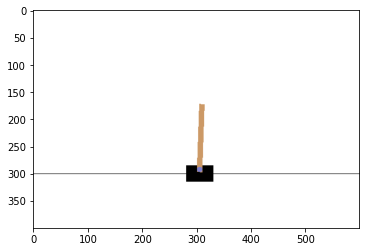

In [ ]:
offpolicy_qlearn_average = np.mean(test_policy(Q_offpolicy_qlearn))
print('Average score using off policy SARSA:', offpolicy_qlearn_average)

We can see that the off-policy Q learning performed decently well balancing up to 60 time steps on average. 

##c. Off-Policy Expected SARSA

In [ ]:
def update_pi(Q,s,pi):
    pi[str(s)] = [epsilon/2, epsilon/2]
    pi[str(s)][np.argmax(Q[str(s)])] += 1- epsilon 
    return pi

#initialize Q
#discretize the state space
cp_space = np.linspace(-2.4,2.4, 50)
cv_space = np.linspace(-2, 2, 50)
pa_space = np.linspace(-41.8, 41.8, 50)
pvt_space = np.linspace(-3, 3, 50)

n_S = len(cp_space)*len(cv_space)*len(pa_space)*len(pvt_space)
n_A = 2
s = np.zeros(shape = (n_S, 4))


cp_index = 0 
cv_index = 0
pa_index = 0
pvt_index = 0

for i in range(n_S):
    s[i][3] = pvt_space[pvt_index]
    s[i][2] = pa_space[pa_index]
    s[i][1] = cv_space[cv_index]
    s[i][0] = cp_space[cp_index]
    pvt_index += 1
    if pvt_index == len(pvt_space):
        pvt_index = 0
        pa_index+=1
        if pa_index == len(pa_space):
            pa_index = 0
            cv_index+=1
            if cv_index == len(cv_space):
                cv_index = 0
                cp_index +=1
s = s.tolist()

Q_offpolicy_SARSA = {}
pi = {}

for state in s:
    Q_offpolicy_SARSA[str(state)] = [0,0]
    pi[str(state)] = [0,0]
    pi[str(state)][np.argmax(Q_offpolicy_SARSA[str(state)])] = 1


#Set algorithm parameters
maxEpisodes = 10000
maxSteps = 1000
epsilon = 0.1
alpha = 0.5
discount = 0.9

for episode in range(maxEpisodes):
    time_step = 0
    s = disc_state(env.reset())
    t = 0
    while t < maxSteps:
        a = action_selection(Q_offpolicy_SARSA, s)
        s_, r, gameState, _ = env.step(a)
        s_ = disc_state(s_)
        Q_offpolicy_SARSA[str(s)][a] =  Q_offpolicy_SARSA[str(s)][a] + alpha * (r + discount*(pi[str(s_)][0]*Q_offpolicy_SARSA[str(s_)][0]+pi[str(s_)][1]*Q_offpolicy_SARSA[str(s_)][1])  -  Q_offpolicy_SARSA[str(s)][a] ) 
        pi = update_pi(Q_offpolicy_SARSA,s_,pi)
        s = s_
        
        t += 1
        
        if gameState == True:
            break

Average score using off policy SARSA: 99.0


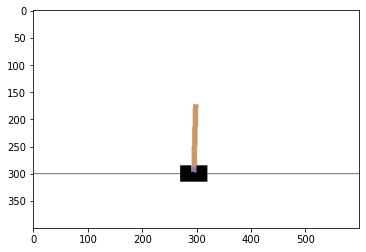

In [ ]:
offpolicy_expected_average = np.mean(test_policy(Q_offpolicy_SARSA))
print('Average score using off policy SARSA:', offpolicy_expected_average)



We can see the average reward using the off policy expected SARSA algorithm is 99 which is better than the previous algorithms. 